In [55]:
# Imports

import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Define sample functions for Stake and Roobet
def sampleStake():
    return max(1,2**32/(random.randint(1,2**32))*0.99)

def sampleRoobet():
    e = 2**52
    h = random.randint(0,2**52-1)
    return 1 if h%25 == 0 else math.floor((100*e-h)/(e-h))/100.0

In [67]:
# Perform sampling, with samples size n
n = 100000
stake_samples = np.array(sorted([sampleStake() for i in range(n)]))
roobet_samples = np.array(sorted([sampleRoobet() for i in range(n)]))

In [68]:
# Compute both the analytical CDF and the sampled CDF for a selected range of crash point values
x_values = np.arange(1,10,0.01)
j = 0
k = 0
stake_emperical_cdf = np.zeros(len(x_values))
roobet_emperical_cdf = np.zeros(len(x_values))
stake_analytical_cdf = np.zeros(len(x_values))
roobet_analytical_cdf = np.zeros(len(x_values))
for i,x in enumerate(x_values):
    while j < len(stake_samples) and stake_samples[j] <= x:
        j += 1
    while k < len(roobet_samples) and roobet_samples[k] <= x:
        k += 1
    stake_emperical_cdf[i] = j/n
    roobet_emperical_cdf[i] = k/n
    stake_analytical_cdf[i] = 1 - 0.99/x
    roobet_analytical_cdf[i] = 0.04 + 0.96*(1-0.99/(x-0.01))

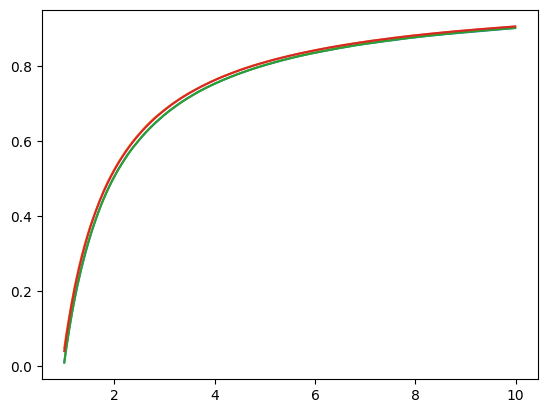

In [71]:
plt.plot(x_values, stake_emperical_cdf)
plt.plot(x_values, roobet_emperical_cdf)
plt.plot(x_values, stake_analytical_cdf)
plt.plot(x_values, roobet_analytical_cdf)